In [1]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng(2021)
from sklearn.metrics import ConfusionMatrixDisplay
import torch

In [2]:
dictionary = torch.load('data.pt')
train_images = (dictionary['train_images'] >= 0.5).float()
train_labels = 2 * dictionary['train_labels'] - 1
test_images = (dictionary['test_images'] >= 0.5).float()
test_labels = 2 * dictionary['test_labels'] - 1

In [3]:
def perceptron(X, Y, w, max_iter, eta=0.01):
    X = Y * X
    convergence = False
    num_iters = 0

    while not convergence and num_iters < max_iter:
        incorrect = X @ w < 0
        w += eta * X[incorrect].sum(axis=0)

        convergence = not incorrect.any()
        num_iters += 1

    incorrect = X @ w < 0
    return convergence, incorrect.mean(), num_iters

In [4]:
w = rng.normal(size=train_images.shape[1])

In [5]:
results = perceptron(train_images.numpy(), train_labels[:, None].numpy(), w, 1000)
print('(converged, error, iterations):', results)

(converged, error, iterations): (False, 0.01250403355921265, 1000)


In [6]:
print('Train classification error:', (train_labels[:, None] * train_images @ w < 0).float().mean().item())
print('Test classification error:', (test_labels[:, None] * test_images @ w < 0).float().mean().item())

Train classification error: 0.012504033744335175
Test classification error: 0.02453385666012764


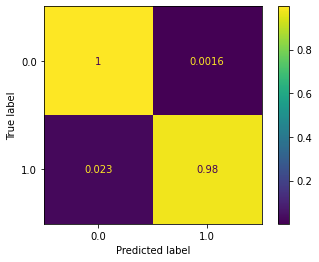

In [7]:
ConfusionMatrixDisplay.from_predictions(
    (train_labels + 1) / 2, train_images @ w >= 0, normalize='true',
)

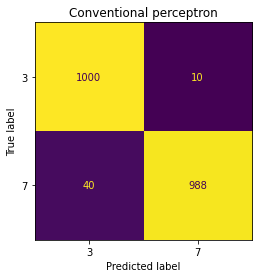

In [20]:
disp = ConfusionMatrixDisplay.from_predictions(
    (test_labels + 1) / 2, test_images @ w >= 0,
    colorbar=False, display_labels=['3', '7'],
)
disp.ax_.set_title('Conventional perceptron')
disp.figure_.savefig('conventional_cm.pdf')

In [10]:
def weights_to_literals(w, precision=8):
    w_normalized = w / np.abs(w).max()
    w_quantized = (w_normalized * (2 ** precision - 1)).astype(int)
    w_literals = map(lambda w: f'{precision + 1}\'d{2 ** precision * (w < 0) + np.abs(w)}', w_quantized)
    
    return ','.join(w_literals)

weights_to_literals(w)

"9'd0,9'd260,9'd261,9'd7,9'd0,9'd258,9'd0,9'd273,9'd261,9'd266,9'd2,9'd258,9'd6,9'd2,9'd264,9'd1,9'd260,9'd0,9'd1,9'd260,9'd5,9'd1,9'd0,9'd265,9'd259,9'd260,9'd6,9'd15,9'd0,9'd270,9'd264,9'd5,9'd262,9'd17,9'd266,9'd5,9'd0,9'd259,9'd258,9'd259,9'd4,9'd261,9'd0,9'd261,9'd11,9'd6,9'd1,9'd258,9'd260,9'd3,9'd258,9'd0,9'd260,9'd6,9'd3,9'd1,9'd5,9'd258,9'd258,9'd5,9'd0,9'd3,9'd0,9'd0,9'd266,9'd0,9'd265,9'd264,9'd261,9'd12,9'd4,9'd0,9'd292,9'd288,9'd259,9'd264,9'd0,9'd5,9'd0,9'd3,9'd7,9'd5,9'd258,9'd2,9'd1,9'd1,9'd3,9'd5,9'd264,9'd0,9'd261,9'd257,9'd294,9'd259,9'd305,9'd310,9'd347,9'd281,9'd293,9'd349,9'd330,9'd312,9'd322,9'd267,9'd268,9'd262,9'd4,9'd259,9'd4,9'd261,9'd264,9'd11,9'd257,9'd18,9'd6,9'd2,9'd2,9'd273,9'd268,9'd323,9'd297,9'd332,9'd389,9'd471,9'd509,9'd507,9'd419,9'd473,9'd475,9'd382,9'd399,9'd351,9'd286,9'd277,9'd6,9'd261,9'd8,9'd270,9'd1,9'd7,9'd0,9'd261,9'd0,9'd264,9'd261,9'd40,9'd32,9'd306,9'd35,9'd109,9'd274,9'd291,9'd305,9'd305,9'd10,9'd280,9'd285,9'd345,9'd389,9'd393,9'd436,

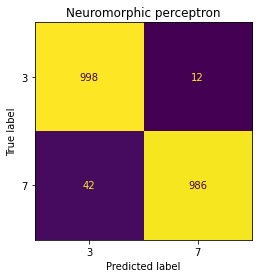

In [27]:
tp, fp, fn, tn = 998, 12, 42, 986
disp = ConfusionMatrixDisplay.from_predictions(
    [0]*(tp + fp) + [1]*(fn + tn), [0]*(tp) + [1]*(fp) + [0]*(fn) + [1]*(tn),
    colorbar=False, display_labels=['3', '7'],
)
disp.ax_.set_title('Neuromorphic perceptron')
disp.figure_.savefig('neuromorphic_cm.pdf')